In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

# Time Series Demo

In [3]:
electricity = pd.read_csv("./data/Electric_Production.csv")
electricity

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
electricity.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [5]:
electricity.DATE = pd.to_datetime(electricity.DATE, format = "%m/%d/%Y")

In [6]:
electricity.describe()

,DATE,IPG2211A2N
count,397,397.000000
mean,2001-07-01 13:25:14.357682560,88.847218
min,1985-01-01 00:00:00,55.315100
25%,1993-04-01 00:00:00,77.105200
50%,2001-07-01 00:00:00,89.779500
75%,2009-10-01 00:00:00,100.524400
max,2018-01-01 00:00:00,129.404800
std,NaN,15.387834


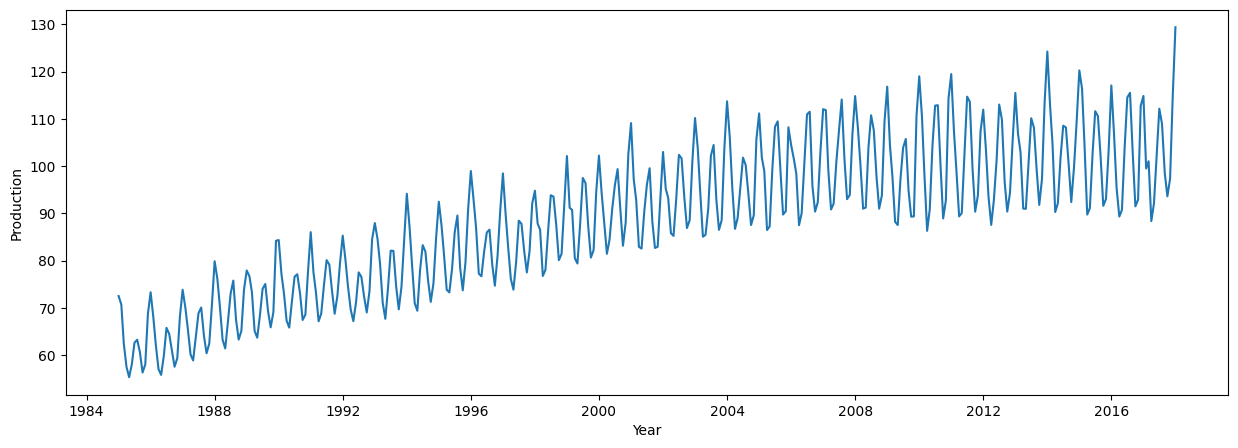

In [7]:
plt.figure(figsize=[15, 5])
plt.plot(electricity.DATE, electricity.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

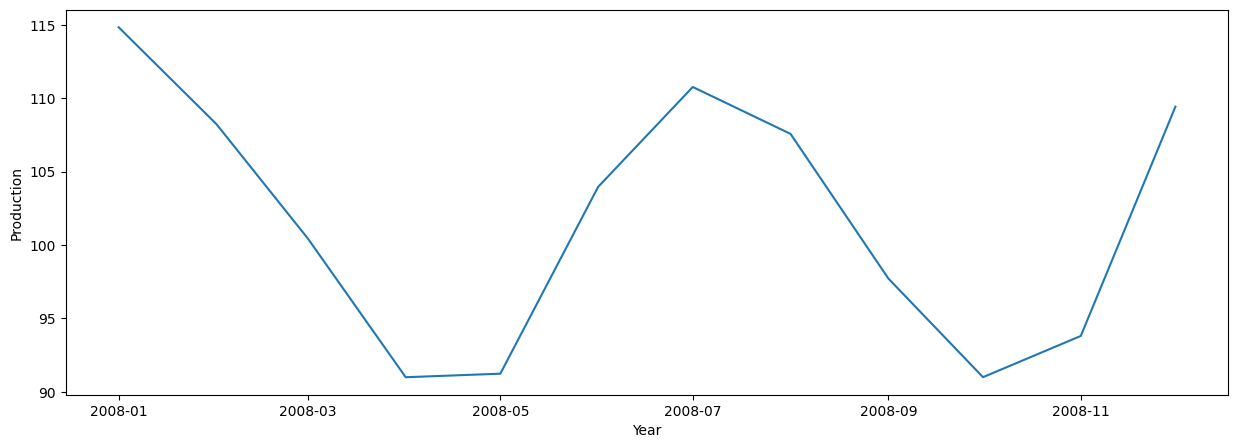

In [8]:
year_2008 = electricity[electricity.DATE.dt.year == 2008]

plt.figure(figsize=[15, 5])
plt.plot(year_2008.DATE, year_2008.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

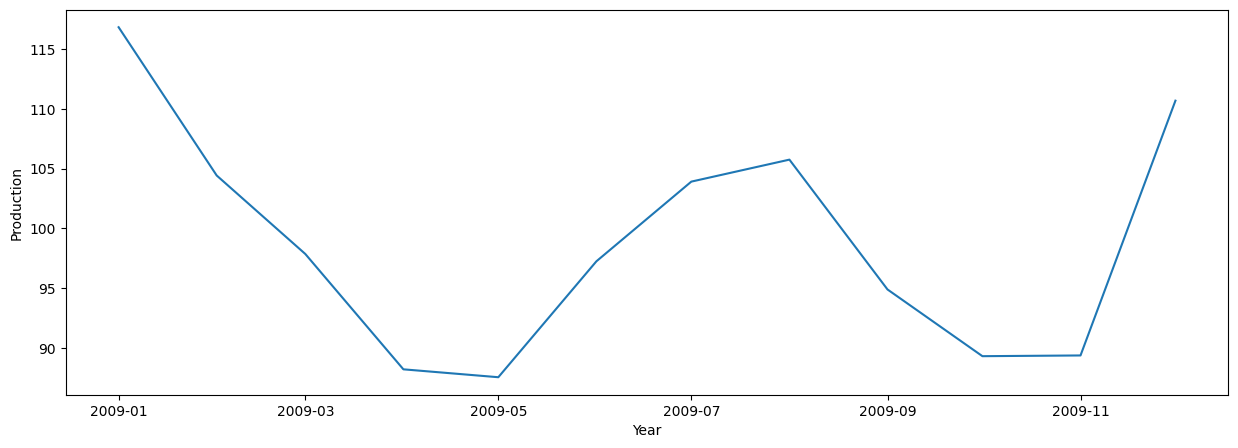

In [9]:
year_2009 = electricity[electricity.DATE.dt.year == 2009]

plt.figure(figsize=[15, 5])
plt.plot(year_2009.DATE, year_2009.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

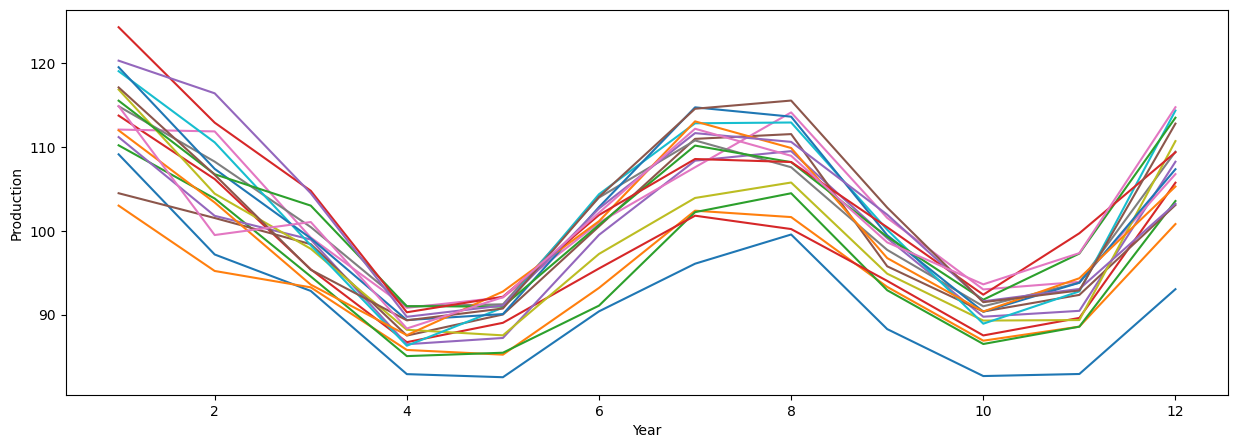

In [10]:
plt.figure(figsize=[15, 5])

for year in range(2001, 2018):
    current_year  = electricity[electricity.DATE.dt.year == year]
    plt.plot(current_year.DATE.dt.month, current_year.IPG2211A2N)
    
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

In [11]:
electricity["year"] = electricity.DATE.dt.year
electricity["month"] = electricity.DATE.dt.month
electricity = electricity.drop(columns=["DATE"])
electricity

,IPG2211A2N,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [12]:
target = electricity.IPG2211A2N
attributes = electricity.drop(columns=["IPG2211A2N"])

attributes_train, attributes_test, target_train, target_test =  train_test_split(attributes, target, test_size=0.2)
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((317, 2), (80, 2), (317,), (80,))

In [13]:
linear_regression = Ridge(alpha = 11)
linear_regression.fit(attributes_train, target_train)

Ridge(alpha=11)

In [14]:
linear_regression.score(attributes_train, target_train)

0.7198725520243665

In [15]:
linear_regression.score(attributes_test, target_test)

0.6617699334211166

In [16]:
test_predictions = linear_regression.predict(attributes_test)

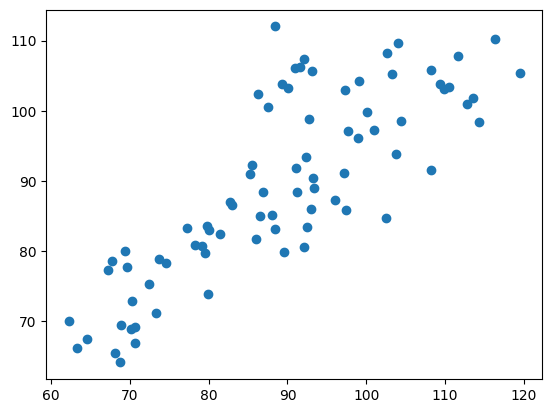

In [17]:
plt.scatter(target_test, test_predictions)

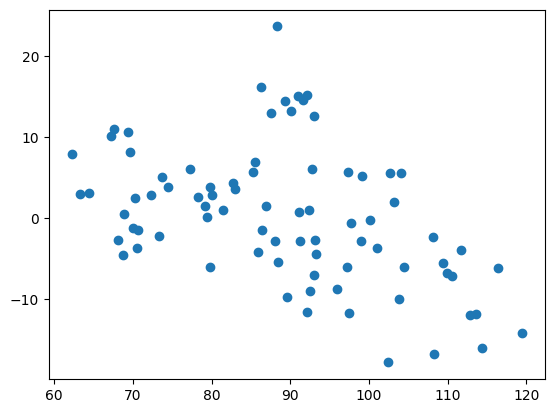

In [18]:
plt.scatter(target_test, (test_predictions - target_test))

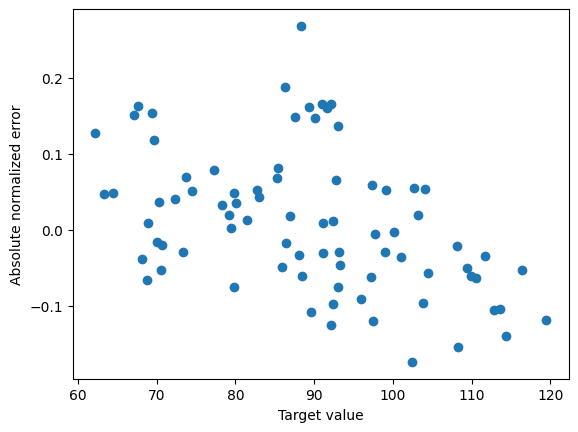

In [19]:
plt.scatter(target_test, ((test_predictions - target_test) / target_test))
plt.xlabel("Target value")
plt.ylabel("Absolute normalized error")
plt.show()

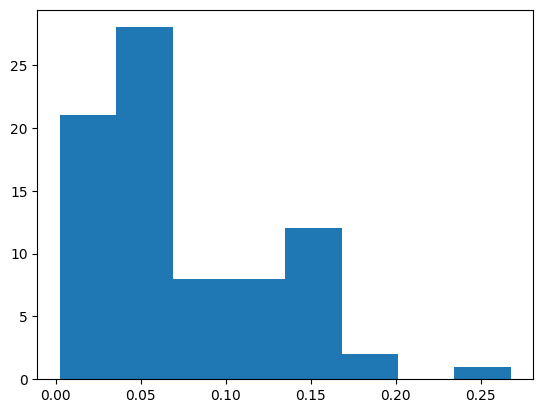

In [20]:
plt.hist(np.abs((test_predictions - target_test) / target_test), bins="fd")
plt.show()

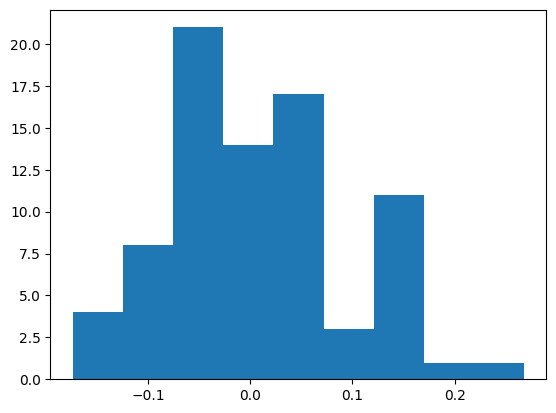

In [21]:
plt.hist(((test_predictions - target_test) / target_test), bins="fd")
plt.show()

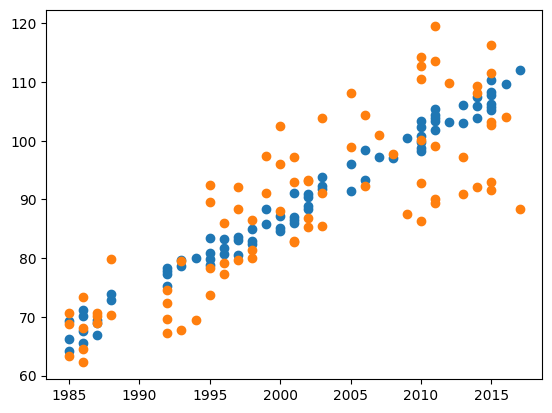

In [22]:
plt.scatter(attributes_test.year, test_predictions, label="Predictions")
plt.scatter(attributes_test.year, target_test, label="Target")

In [23]:
electricity.shift(-1)

,IPG2211A2N,year,month
0,70.6720,1985.0,2.0
1,62.4502,1985.0,3.0
2,57.4714,1985.0,4.0
3,55.3151,1985.0,5.0
4,58.0904,1985.0,6.0
...,...,...,...
392,93.6137,2017.0,10.0
393,97.3359,2017.0,11.0
394,114.7212,2017.0,12.0
395,129.4048,2018.0,1.0


In [24]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(1))

0.8717308657532125

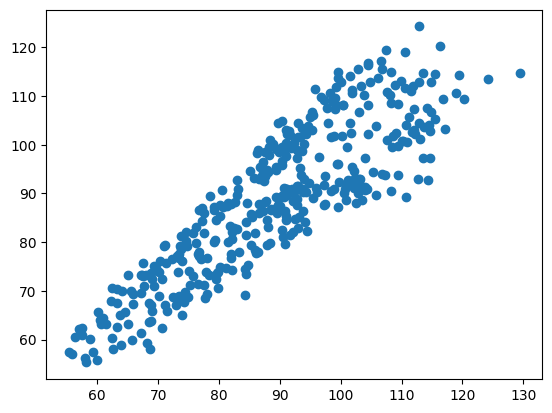

In [25]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(1))

In [26]:
electricity["IPG2211A2N"].corr(electricity["IPG2211A2N"].shift(12))


0.9745298544620412

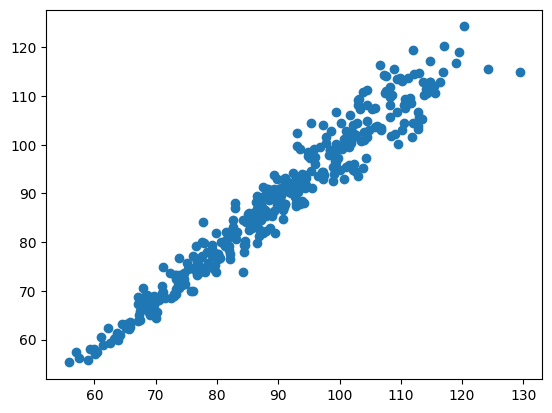

In [27]:
plt.scatter(electricity["IPG2211A2N"], electricity["IPG2211A2N"].shift(12))


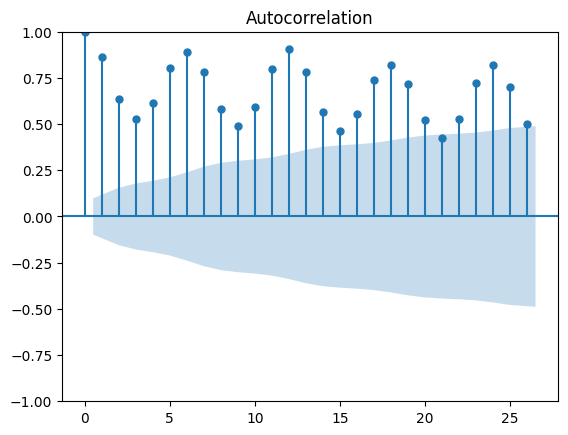

In [28]:
plot_acf(electricity.IPG2211A2N)
plt.show()

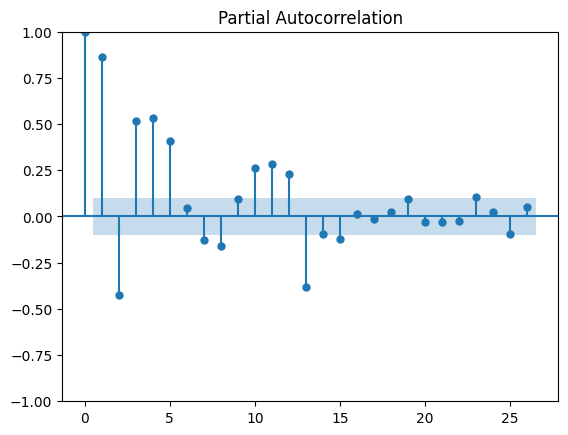

In [29]:
plot_pacf(electricity.IPG2211A2N)
plt.show()

In [30]:
for lag in range(1, 24):
    electricity[f"lag_{lag}"] = electricity.IPG2211A2N.shift(lag)

electricity = electricity.dropna()

In [31]:
electricity

,IPG2211A2N,year,month,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
23,68.1354,1986,12,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,55.8137,...,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
24,73.8152,1987,1,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,...,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
25,70.0620,1987,2,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,...,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
26,65.6100,1987,3,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,...,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
27,60.1586,1987,4,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,...,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,99.4901,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
393,93.6137,2017,10,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
394,97.3359,2017,11,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203
395,114.7212,2017,12,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837


In [32]:
target = electricity.IPG2211A2N
attributes = electricity.drop(columns=["IPG2211A2N"])

attributes_train, attributes_test, target_train, target_test =  train_test_split(attributes, target, test_size=0.2, random_state=1234)
attributes_train.shape, attributes_test.shape, target_train.shape, target_test.shape

((299, 25), (75, 25), (299,), (75,))

In [33]:
pca = PCA(n_components=0.98)
pca.fit(attributes_train)

PCA(n_components=0.98)

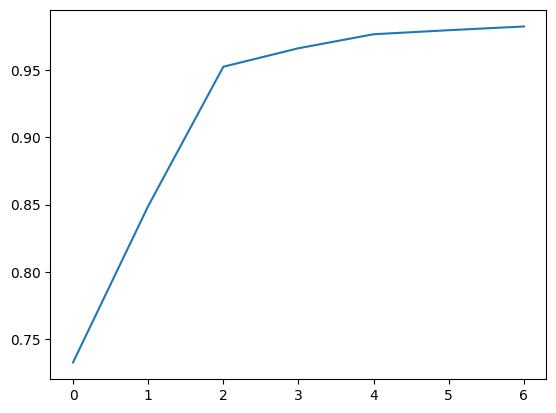

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [35]:
linear_ar_model = Ridge(alpha=1)
linear_ar_model.fit(attributes_train, target_train)

Ridge(alpha=1)

In [36]:
linear_ar_model.score(attributes_train, target_train)

0.9701551746129462

In [37]:
linear_ar_model.score(attributes_test, target_test)

0.9498461376634761

In [38]:
test_predictions = linear_ar_model.predict(attributes_test)

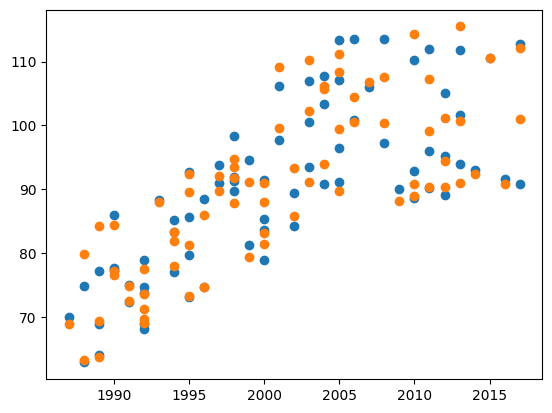

In [39]:
plt.scatter(attributes_test.year, test_predictions, label="Predictions")
plt.scatter(attributes_test.year, target_test, label="Target")

In [40]:
linear_ar_model.coef_

array([ 1.35133282e-02,  2.14811723e-01,  6.89731732e-01, -1.02778701e-01,
        6.65039726e-02,  5.57656846e-03, -1.53142124e-02, -4.16369430e-04,
       -9.76871501e-03, -5.16388908e-02, -6.88448398e-02,  1.71566987e-01,
       -8.27064177e-02,  6.06065124e-01, -3.35573861e-01,  8.86006409e-02,
       -1.39898179e-01,  5.21855174e-02,  1.16415101e-01, -9.34228963e-03,
        8.46647664e-02, -6.40450624e-02, -8.61210098e-02, -2.24048653e-02,
        7.34237469e-02])

In [41]:
stl = STL(electricity.IPG2211A2N, period=12)
result = stl.fit()

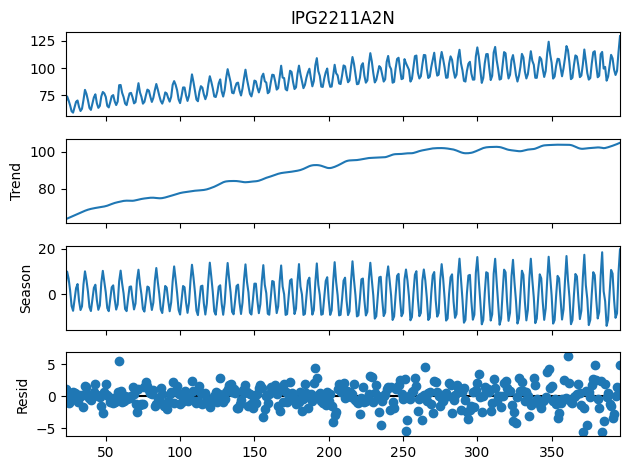

In [42]:
result.plot()
plt.show()